In [1]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/austin_weather.csv')

In [3]:
data.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [4]:
#target_date = datetime(2016, 5, 16)
features = ["date", "TempAvgF", "DewPointAvgF", "SeaLevelPressureAvgInches", "HumidityHighPercent", "HumidityLowPercent", "TempHighF",
            "TempLowF", "DewPointHighF", "DewPointLowF", "SeaLevelPressureHighInches", "SeaLevelPressureLowInches", "PrecipitationSumInches"]
DailySummary = namedtuple("DailySummary", features)

In [5]:
# def extract_weather_data(url, api_key, target_date, days):
#     records = []
#     for _ in range(days):
#         request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
#         response = requests.get(request)
#         if response.status_code == 200:
#             data = response.json()['history']['dailysummary'][0]
#             records.append(DailySummary(
#                 date=target_date,
#                 meantempm=data['meantempm'],
#                 meandewptm=data['meandewptm'],
#                 meanpressurem=data['meanpressurem'],
#                 maxhumidity=data['maxhumidity'],
#                 minhumidity=data['minhumidity'],
#                 maxtempm=data['maxtempm'],
#                 mintempm=data['mintempm'],
#                 maxdewptm=data['maxdewptm'],
#                 mindewptm=data['mindewptm'],
#                 maxpressurem=data['maxpressurem'],
#                 minpressurem=data['minpressurem'],
#                 precipm=data['precipm']))
#         time.sleep(6)
#         target_date += timedelta(days=1)
#     return records

In [6]:
#records = extract_weather_data(BASE_URL, API_KEY, target_date, 5)

In [7]:
#records

In [8]:
#records += extract_weather_data(BASE_URL, API_KEY, target_date, 500)

In [9]:
#df = pd.DataFrame(records, columns=features).set_index('date')

In [10]:
tmp = data[['TempAvgF', 'DewPointAvgF']].head(10)
tmp

,TempAvgF,DewPointAvgF
0,60,49
1,48,36
2,45,27
3,46,28
4,50,40
5,48,36
6,53,39
7,51,39
8,50,41
9,40,26


In [11]:
# 1 day prior
N = 1

# target measurement of mean temperature
feature = 'TempAvgF'

# total number of rows
rows = tmp.shape[0]

# a list representing Nth prior measurements of feature
# notice that the front of the list needs to be padded with N
# None values to maintain the constistent rows length for each N
nth_prior_measurements = [None]*N + [tmp[feature][i-N] for i in range(N, rows)]

# make a new column name of feature_N and add to DataFrame
col_name = "{}_{}".format(feature, N)
tmp[col_name] = nth_prior_measurements
tmp

,TempAvgF,DewPointAvgF,TempAvgF_1
0,60,49,NaN
1,48,36,60.0
2,45,27,48.0
3,46,28,45.0
4,50,40,46.0
5,48,36,50.0
6,53,39,48.0
7,51,39,53.0
8,50,41,51.0
9,40,26,50.0


In [12]:
def derive_nth_day_feature(data, feature, N):
    rows = data.shape[0]
    nth_prior_measurements = [None]*N + [data[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    data[col_name] = nth_prior_measurements

In [13]:
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(data, feature, N)

In [14]:
data.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events', 'TempAvgF_1',
       'TempAvgF_2', 'TempAvgF_3', 'DewPointAvgF_1', 'DewPointAvgF_2',
       'DewPointAvgF_3', 'SeaLevelPressureAvgInches_1',
       'SeaLevelPressureAvgInches_2', 'SeaLevelPressureAvgInches_3',
       'HumidityHighPercent_1', 'HumidityHighPercent_2',
       'HumidityHighPercent_3', 'HumidityLowPercent_1', 'HumidityLowPercent_2',
       'HumidityLowPercent_3', 'TempHighF_1', 'TempHighF_2', 'TempHighF_3',
       'TempLowF_1', 'TempLowF_2', 'TempLowF_3', 'DewPointHighF_1',
       'DewPointHighF_2', 'DewPointHighF_3', 'DewPointLowF_1',
 

In [15]:
# make list of original features without meantempm, mintempm, and maxtempm
to_remove = [feature 
             for feature in features 
             if feature not in ['meantempm', 'mintempm', 'maxtempm']]

# make a list of columns to keep
to_keep = [col for col in data.columns if col not in to_remove]

# select only the columns in to_keep and assign to df
df = data[to_keep]
df.columns

Index(['Date', 'HumidityAvgPercent', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'Events', 'TempAvgF_1', 'TempAvgF_2', 'TempAvgF_3',
       'DewPointAvgF_1', 'DewPointAvgF_2', 'DewPointAvgF_3',
       'SeaLevelPressureAvgInches_1', 'SeaLevelPressureAvgInches_2',
       'SeaLevelPressureAvgInches_3', 'HumidityHighPercent_1',
       'HumidityHighPercent_2', 'HumidityHighPercent_3',
       'HumidityLowPercent_1', 'HumidityLowPercent_2', 'HumidityLowPercent_3',
       'TempHighF_1', 'TempHighF_2', 'TempHighF_3', 'TempLowF_1', 'TempLowF_2',
       'TempLowF_3', 'DewPointHighF_1', 'DewPointHighF_2', 'DewPointHighF_3',
       'DewPointLowF_1', 'DewPointLowF_2', 'DewPointLowF_3',
       'SeaLevelPressureHighInches_1', 'SeaLevelPressureHighInches_2',
       'SeaLevelPressureHighInches_3', 'SeaLevelPressureLowInches_1',
       'SeaLevelPressureLowInches_2', 'SeaLevelPressureLowInches_3',
       'PrecipitationSumInch

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1319 non-null   object 
 1   HumidityAvgPercent            1319 non-null   object 
 2   VisibilityHighMiles           1319 non-null   object 
 3   VisibilityAvgMiles            1319 non-null   object 
 4   VisibilityLowMiles            1319 non-null   object 
 5   WindHighMPH                   1319 non-null   object 
 6   WindAvgMPH                    1319 non-null   object 
 7   WindGustMPH                   1319 non-null   object 
 8   Events                        1319 non-null   object 
 9   TempAvgF_1                    1318 non-null   float64
 10  TempAvgF_2                    1317 non-null   float64
 11  TempAvgF_3                    1316 non-null   float64
 12  DewPointAvgF_1                1318 non-null   object 
 13  Dew

In [17]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          0 non-null      float64
 1   HumidityAvgPercent            1317 non-null   float64
 2   VisibilityHighMiles           1307 non-null   float64
 3   VisibilityAvgMiles            1307 non-null   float64
 4   VisibilityLowMiles            1307 non-null   float64
 5   WindHighMPH                   1317 non-null   float64
 6   WindAvgMPH                    1317 non-null   float64
 7   WindGustMPH                   1315 non-null   float64
 8   Events                        0 non-null      float64
 9   TempAvgF_1                    1318 non-null   float64
 10  TempAvgF_2                    1317 non-null   float64
 11  TempAvgF_3                    1316 non-null   float64
 12  DewPointAvgF_1                1311 non-null   float64
 13  Dew

In [18]:
# Call describe on df and transpose it due to the large number of columns
spread = df.describe().T

# precalculate interquartile range for ease of use in next calculation
IQR = spread['75%'] - spread['25%']

# create an outliers column which is either 3 IQRs below the first quartile or
# 3 IQRs above the third quartile
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))

# just display the features containing extreme outliers
spread.loc[spread.outliers,]

,count,mean,std,min,25%,50%,75%,max,outliers
VisibilityHighMiles,1307.0,9.991584,0.163489,5.00,10.00,10.0,10.00,10.00,True
VisibilityAvgMiles,1307.0,9.162204,1.458883,2.00,9.00,10.0,10.00,10.00,True
WindGustMPH,1315.0,21.373384,5.875657,9.00,17.00,21.0,25.00,57.00,True
SeaLevelPressureAvgInches_1,1315.0,30.022943,0.172205,29.55,29.91,30.0,30.10,30.74,True
SeaLevelPressureAvgInches_2,1314.0,30.023029,0.172242,29.55,29.91,30.0,30.10,30.74,True
SeaLevelPressureAvgInches_3,1313.0,30.023153,0.172249,29.55,29.91,30.0,30.10,30.74,True
HumidityHighPercent_1,1316.0,87.890578,11.023178,37.00,85.00,90.0,94.00,100.00,True
HumidityHighPercent_2,1315.0,87.904943,11.015042,37.00,85.00,90.0,94.00,100.00,True
HumidityHighPercent_3,1314.0,87.909437,11.018029,37.00,85.00,90.0,94.00,100.00,True
PrecipitationSumInches_1,1194.0,0.126374,0.448362,0.00,0.00,0.0,0.01,5.20,True


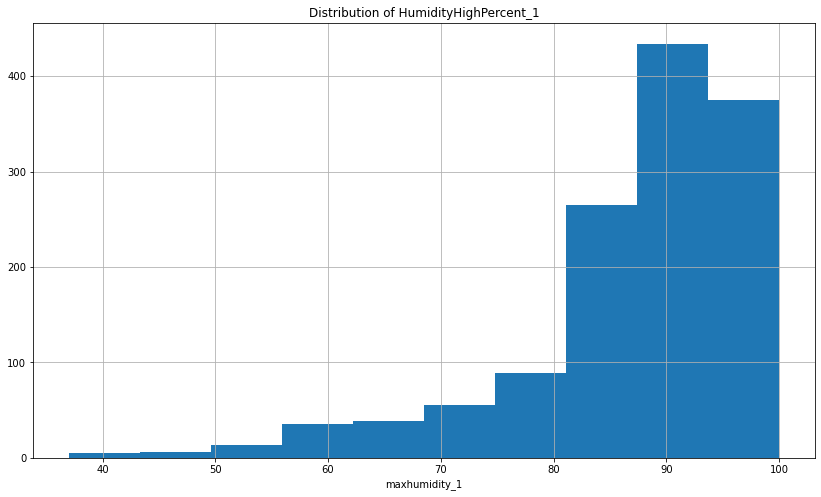

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df.HumidityHighPercent_1.hist()
plt.title('Distribution of HumidityHighPercent_1')
plt.xlabel('maxhumidity_1')
plt.show()

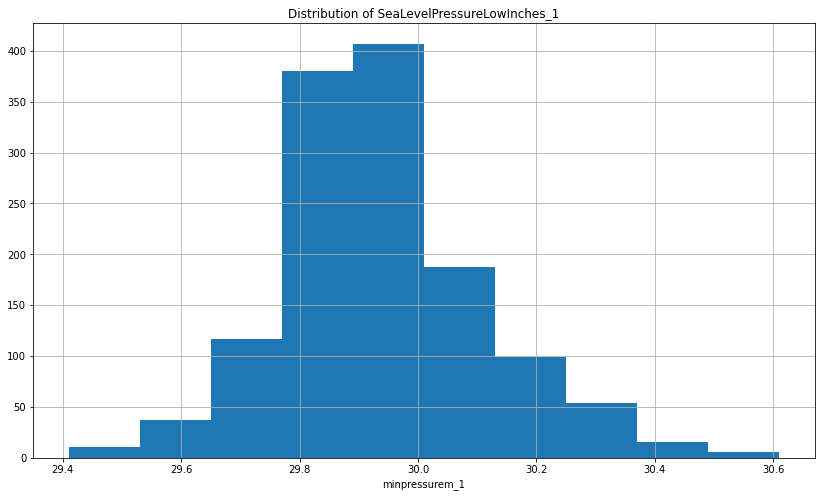

In [20]:
df.SeaLevelPressureLowInches_1.hist()
plt.title('Distribution of SeaLevelPressureLowInches_1')
plt.xlabel('minpressurem_1')
plt.show()

In [21]:
# iterate over the precip columns
for precip_col in ['PrecipitationSumInches_1', 'PrecipitationSumInches_2', 'PrecipitationSumInches_3']:
    # create a boolean array of values representing nans
    missing_vals = pd.isnull(df[precip_col])
    df[precip_col][missing_vals] = 0

In [22]:
df = df.dropna()